In [1]:
import json
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support as prf
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import os
import csv
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# 2 roc curves for distance thresholds and 1 table with roc auc and fscore for parameters epidemicmodel and ml classifier

In [3]:
def extract_features(X):
    return np.array([[len(x), np.max(x), np.mean(x)] for x in X])

In [169]:
## human_human training dataset load

def human_human():
 pathlist=[]
 filelist=[]
 pr0='F:/junaid/epidemic/datasets/rss_HumanHuman-master/rss_HumanHuman-master'
 pr1= os.listdir(pr0)
 for x in pr1:
     filelist.append(os.listdir(pr0+'/'+x))
     pathlist.append(pr0+'/'+x)
  
 filelist=np.array(filelist)
 traindata=[]
 for i in range(len(pathlist)):
     datasetfile=filelist[:,2][i]
     pathfile=pathlist[i]
     with open(pathfile+'/'+datasetfile, newline='', encoding='ANSI') as f:
          reader = csv.reader(f)
          #traindata.append(list(reader))
          traindata=traindata+list(reader)[1:]
 
 traindata=np.array(traindata)
 ## human_human test data load
 testdata=[]
 for i in range(len(pathlist)):
     datasetfile=filelist[:,1][i]
     pathfile=pathlist[i]
     with open(pathfile+'/'+datasetfile, newline='', encoding='ANSI') as f:
          reader = csv.reader(f)
          #testdata.append(list(reader))
          testdata=testdata+list(reader)[1:]
 testdata=np.array(testdata)
 ### human_human dataset vectors formation
 nts=500 # training samples
 shfindcs=np.arange(len(traindata))
 np.random.shuffle(shfindcs)
 X_train=traindata[:,2][shfindcs][:nts*int(len(traindata)/nts)].reshape(nts,int(len(traindata)/nts)).astype('int')
 traindist=traindata[:,5][shfindcs][:nts*int(len(traindata)/nts)].reshape(nts,int(len(traindata)/nts)).astype('int')
 ### human_human dataset vectors formation /test
 vlen=traindist.shape[1] # vector len
 shfindcs=np.arange(len(testdata))
 np.random.shuffle(shfindcs)
 X_test=testdata[:,2][shfindcs][:int(len(testdata)/vlen)*vlen].reshape(int(len(testdata)/vlen),vlen).astype('int')
 testdist=testdata[:,5][shfindcs][:int(len(testdata)/vlen)*vlen].reshape(int(len(testdata)/vlen),vlen).astype('int')
 cmthresh =75 #75
 reflen=100
 return cmthresh,reflen,testdist,traindist,X_test,X_train

In [165]:
# nature dataset load

def nature_data():
 datasetpath="F:/junaid/epidemic/proximity-tracing/"
 # The reference Sequence, 600 secondes at a distance of 'cmthresh', for which we assume a contact is dangerous 
 data_train = json.load(open(datasetpath+"data_train.json", "r"))
 X_train = [d["rss"] for d in data_train]
 data_test = json.load( open(datasetpath+"data_test.json", "r"))
 X_test = [d["rss"] for d in data_test] # for nature
 traindist=[d["dist"] for d in data_train]
 testdist=[d["dist"] for d in data_test]
 cmthresh =  225 #225
 reflen=600
 return cmthresh,reflen,testdist,traindist,X_test,X_train

#y_train = [np.sum(epi_model(d["dist"]))>THRESHOLD for d in data_train]  # for nature
#y_test = [np.sum(epi_model(d["dist"]))>THRESHOLD for d in data_test]  # for nature

#y_train = [np.sum(epi_model(d))>THRESHOLD for d in traindist]  ## labels for human human data
#y_test = [np.sum(epi_model(d))>THRESHOLD for d in testdist] # for human human


In [166]:
epidemiologic_models = {
  "linear" : lambda x : 1/np.array(x),
  "box" : lambda x : np.array(x)<=cmthresh,
  "sigmoid" : lambda x : (1+np.exp((np.array(x)-cmthresh)/30))**(-1),
    "tanhyp":lambda x : np.tanh((np.array(x)-cmthresh)/30)
}
mlmodel_dict = {"logisticreg": LogisticRegression(max_iter=10000, tol=1e-10), "supportvec": svm.SVC(probability=True),
'lda':LinearDiscriminantAnalysis(), 'dtree':DecisionTreeClassifier() ,'knn':KNeighborsClassifier()}

dataset_load = {"nature": nature_data(), "human": human_human()}


In [167]:
dataset='human' # 'human' , 'nature'
cmthresh,reflen,testdist,traindist,X_test,X_train=dataset_load[dataset]

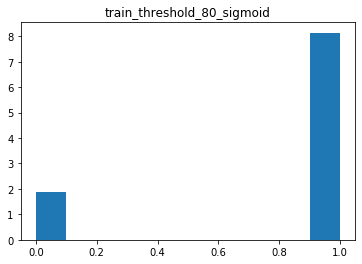

"\nplt.hist(list(map(int,y_test)), density=True)\nplt.title('test_threshold_'+str(cmthresh)+'_'+EPIDEMIOLOGICAL_MODEL)\nplt.savefig('f:/junaid/pdf_test')\nplt.show()\n"

In [168]:
# histogram epidemic model risks across threshold

EPIDEMIOLOGICAL_MODEL ="sigmoid" #"linear","sigmoid" ,"tanhyp"
epi_model = epidemiologic_models[EPIDEMIOLOGICAL_MODEL]
REFERENCE_SEQUENCE = [cmthresh]*reflen
# Compute the THRESHOLD value by inserting the reference sequence into the epidemiological model
THRESHOLD = np.sum(epi_model(REFERENCE_SEQUENCE))
# Label data points as "dangerous" or not by applying the epidemiological model and comparing with the reference sequence
y_train = [np.sum(epi_model(d))>THRESHOLD for d in traindist]  ## labels 
y_test = [np.sum(epi_model(d))>THRESHOLD for d in testdist] ## 
plt.hist(list(map(int,y_train)), density=True)
plt.title('train_threshold_'+str(cmthresh)+'_'+EPIDEMIOLOGICAL_MODEL)
plt.savefig('f:/junaid/pdf_train')
plt.show()
'''
plt.hist(list(map(int,y_test)), density=True)
plt.title('test_threshold_'+str(cmthresh)+'_'+EPIDEMIOLOGICAL_MODEL)
plt.savefig('f:/junaid/pdf_test')
plt.show()
'''

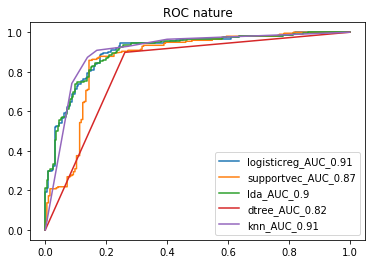

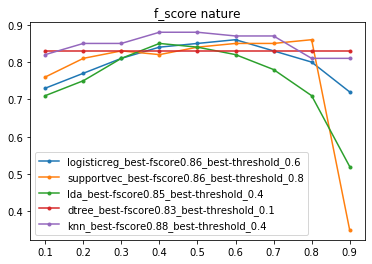

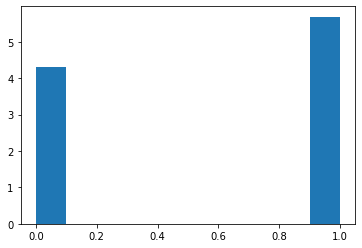

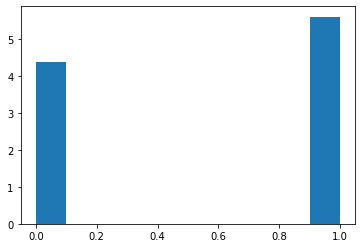

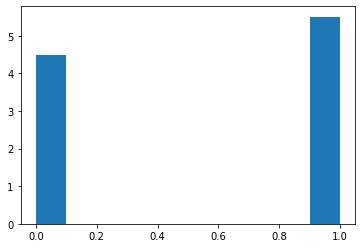

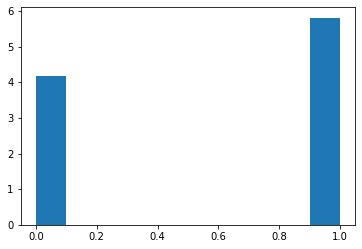

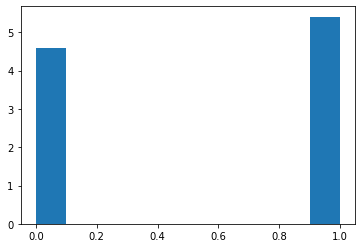

In [17]:
EPIDEMIOLOGICAL_MODEL ="sigmoid" #"linear","sigmoid" ,"tanhyp"
ifig=3
for ml_model in ["logisticreg" , "supportvec",'lda', 'dtree' ,'knn']:
   REFERENCE_SEQUENCE = [cmthresh]*reflen
   # Select the epidemiological model
   epi_model = epidemiologic_models[EPIDEMIOLOGICAL_MODEL]
   model=mlmodel_dict[ml_model]
   # Compute the THRESHOLD value by inserting the reference sequence into the epidemiological model
   THRESHOLD = np.sum(epi_model(REFERENCE_SEQUENCE))
   # Label data points as "dangerous" or not by applying the epidemiological model and comparing with the reference sequence
   y_train = [np.sum(epi_model(d))>THRESHOLD for d in traindist]  ## labels for human human data
   # Only rssi data is used for testing
   y_test = [np.sum(epi_model(d))>THRESHOLD for d in testdist] # for human human
   # Fit the model to the data
   model.fit(extract_features(X_train), y_train)
   # Compute probabilities of dangerous contact using our pretrained model
   y_test_pred_proba = model.predict_proba(extract_features(X_test))
   # Label data points as "dangerous" or not by applying the epidemiological model and comparing with the reference sequence
   fpr, tpr, thresholds=roc_curve(y_test, y_test_pred_proba[:,1])
   auc=str(round(roc_auc_score(y_test, y_test_pred_proba[:,1]),2))
   plt.figure(1)
   plt.plot(fpr,tpr,label=ml_model+'_AUC_'+auc)
   plt.title('ROC '+dataset)
   plt.legend()
   plt.savefig('f:/junaid/roc'+dataset)
   #plt.show()
   f1socres=[]
   CLASSIFIER_THRESHOLDS =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
   for CLASSIFIER_THRESHOLD in CLASSIFIER_THRESHOLDS:
    f1s=round(f1_score(y_test, y_test_pred_proba[:,1]>CLASSIFIER_THRESHOLD),2)
    f1socres.append(f1s)
   plt.figure(2)
   plt.plot(CLASSIFIER_THRESHOLDS,f1socres,marker='.',label=ml_model+'_best-fscore'+str(max(f1socres))+'_best-threshold_'+str(CLASSIFIER_THRESHOLDS[f1socres.index(max(f1socres))]))
   plt.legend()
   plt.title('f_score '+dataset)
   plt.savefig('f:/junaid/fscore'+dataset)
   with open('f:/junaid/epidemic_results.csv', 'a') as csvfile:
     cswres = csv.writer(csvfile)
     cswres.writerow(['dataset','EPIDEM_func','ml_model','auc','max_f1socres','best_CLASSIFIER_THRESHOLD','reference_dist_thresh','reference_vec_len'])
     cswres.writerow([dataset,EPIDEMIOLOGICAL_MODEL,ml_model,auc,max(f1socres),CLASSIFIER_THRESHOLDS[f1socres.index(max(f1socres))],cmthresh,reflen])###
   plt.figure(3+ifig)
   plt.hist(np.argmax(y_test_pred_proba,axis=1), density=True)
   #plt.savefig('f:/junaid/prdpdf'+str(cmthresh)+str(ifig))
   ifig=ifig+1
plt.show()

 # Compute the number Positives, True Positives, Negatives and False Positives 
 TP = np.sum(y_test * (y_test_pred_proba[:,1]>CLASSIFIER_THRESHOLD))
 P = np.sum(y_test)
 FP = np.sum((1-np.array(y_test)) * (y_test_pred_proba[:,1]>CLASSIFIER_THRESHOLD))
 N = np.sum((1-np.array(y_test)) )
 #print('classifier_thresh',CLASSIFIER_THRESHOLD)
 #print("Positive {}\nTrue Positive {}\nNegative {}\nFalse Positive {}".format(P, TP, N, FP))
# neural net
 outdata=to_categorical(outdata1)
 werlabelval=to_categorical(werlabelval1)
 spl=len(indata)
 inputdim=len(indata[0])
 outputdim=len(outdata[0])
 input_flat1 = Input(shape=(inputdim,))
 hidden_layer1 = Dense(int((outputdim+inputdim)/2))(input_flat1)
 h2=BatchNormalization()(hidden_layer1)
 h3=PReLU()(h2)
 h4=Dropout(0.1)(h3)
 output_layer1 = Dense(outputdim, activation='softmax')(h4)
 emodel1 = Model(input_flat1,output_layer1)
 emodel1.compile(optimizer='Nadam', loss='categorical_crossentropy')
 emodel1.summary()
 #plot_model(emodel1, to_file='dmodel.png')
 es = EarlyStopping(monitor='val_loss', mode='min',verbose=1, patience=dpt)
 hist= emodel1.fit(indata,outdata,epochs=epc,batch_size=32,shuffle=True,validation_split=dvspt,callbacks=[es])
 flat_outa = emodel1.predict(werval)
